In [1]:
import blur as blur

In [2]:
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
from pprint import pprint
from scipy.stats import norm
import matplotlib.pyplot as plt

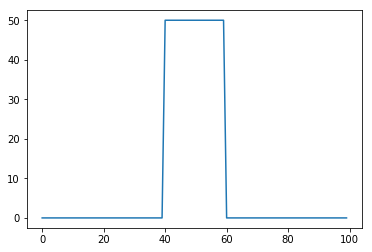

In [3]:
## load image
filename = "f_impulse_100.npy"
f = np.load(filename)
plt.plot(f)
plt.show()

In [4]:
## create forward blur operator
n = len(f)
X = blur.fwdblur_oeprator_1d(n=n)

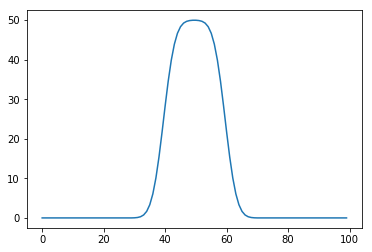

In [5]:
## blur image
g = X.dot(f)
plt.plot(g)
plt.show()

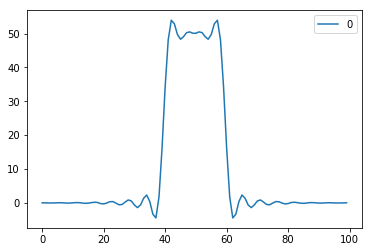

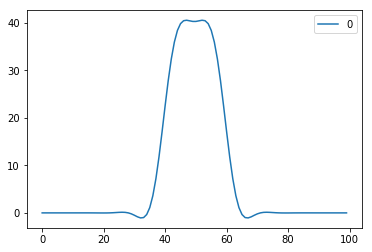

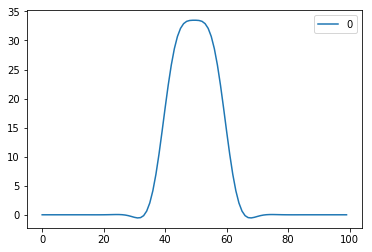

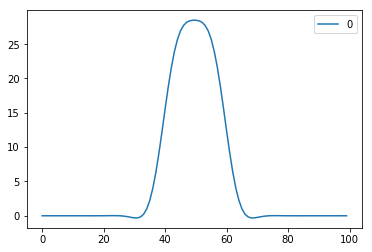

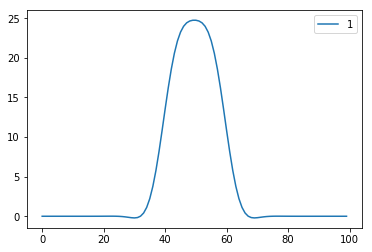

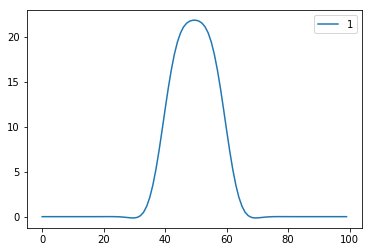

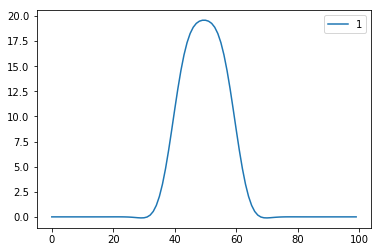

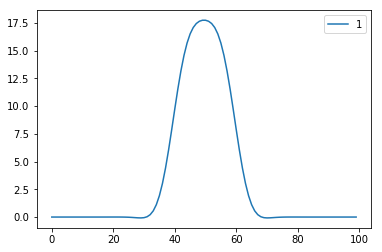

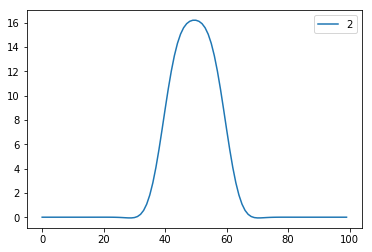

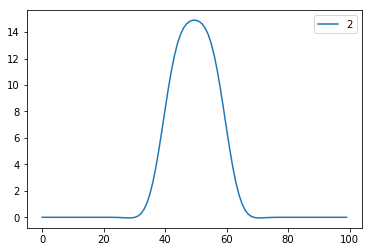

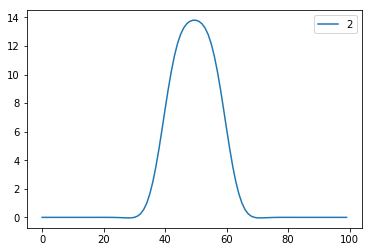

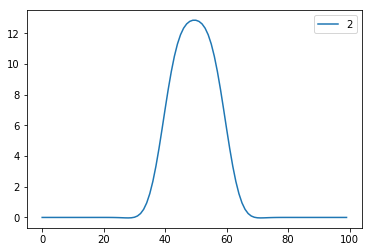

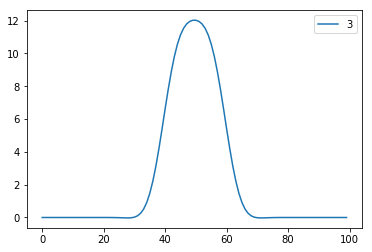

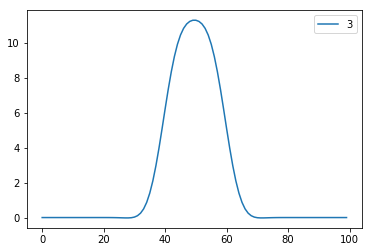

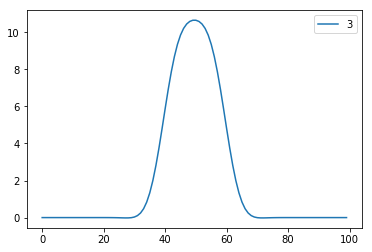

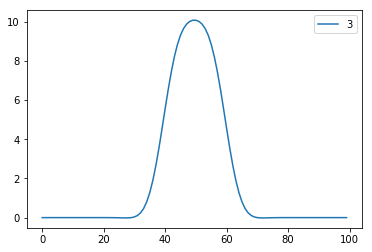

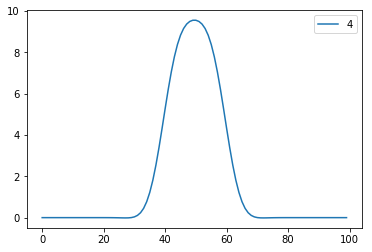

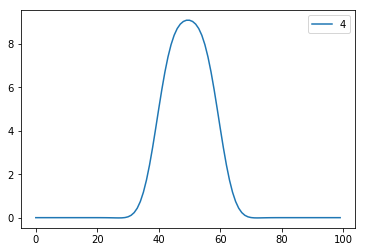

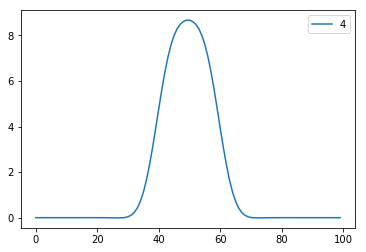

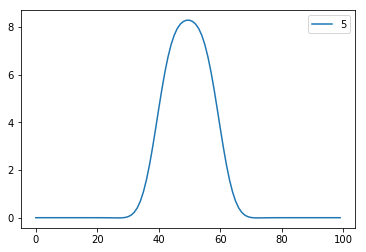

In [6]:
## reconstruct image directly
lams = np.linspace(0.00001, 5, 20)
for lam in lams: 
    B = sps.eye(n)
    A = spsla.inv(X.T.dot(X) + lam*B.T.dot(B))
    R = A.dot(X.T)
    f_hat = R.dot(g)
    plt.plot(f_hat)
    plt.legend(str(round(lam,2)))
    plt.show()